In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import os
import plotly.express as px
from sklearn.metrics import classification_report,accuracy_score,average_precision_score,balanced_accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

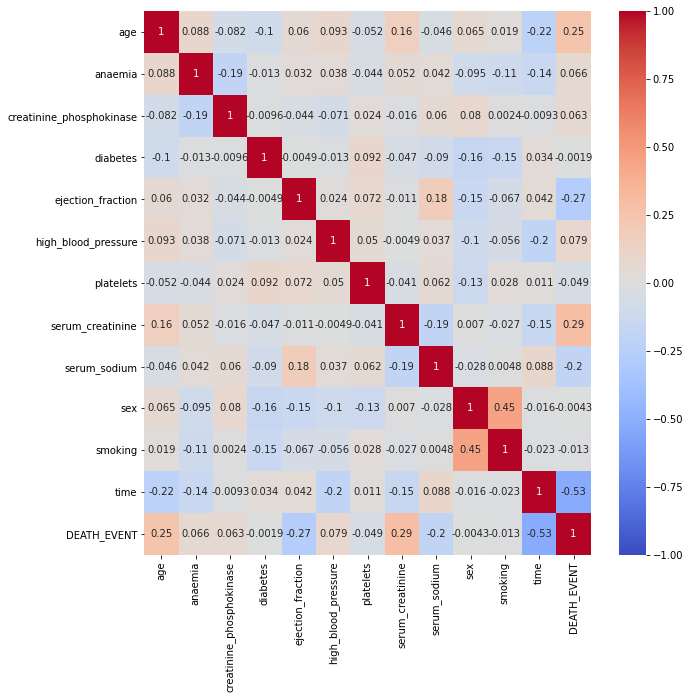

In [82]:
df = pd.read_csv('data/kaggle/heart_failure_clinical_records_dataset.csv')

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [83]:
Features = ['time','ejection_fraction','serum_creatinine']
x = df[Features]
y = df["DEATH_EVENT"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (2, 15), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


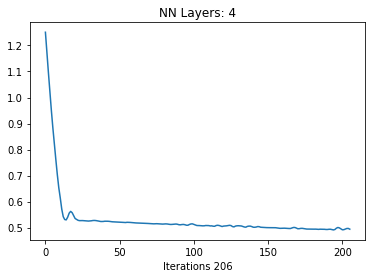

In [84]:
accuracy_list = []

# nn = MLPClassifier(hidden_layer_sizes=(15,4),random_state=1, max_iter=300, 
#                   solver="sgd", nesterovs_momentum=True)
nn = MLPClassifier(hidden_layer_sizes=(2,15),solver="adam",random_state=1, max_iter=300)
nn.fit(x_train, y_train)
nn_pred = nn.predict(x_test)
nn_acc = accuracy_score(y_test, nn_pred)

print(nn.get_params(True))

accuracy_list.append(100*nn_acc)

plt.plot(range(nn.n_iter_), nn.loss_curve_, )
plt.xlabel("Iterations " + str(nn.n_iter_))
plt.title("NN Layers: " + str(nn.n_layers_))
plt.show()

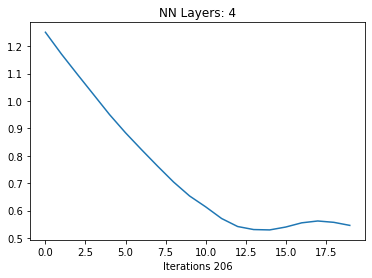

In [85]:
showCount = 20
plt.plot(range(showCount), nn.loss_curve_[0:showCount], )
plt.xlabel("Iterations " + str(nn.n_iter_))
plt.title("NN Layers: " + str(nn.n_layers_))
plt.show()

In [86]:
print(Fore.GREEN + "Accuracy of Multi-layer Perceptron classifier is : ", "{:.2f}%".format(100* nn_acc))

Accuracy of Multi-layer Perceptron classifier is :  86.67%
